In [1]:
import networkx as nx
import glob
import pandas as pd


In [2]:
import numpy as np


In [3]:
import imp

tools = imp.load_source("tools", "../tools.py")

from tools import write_to_file, test_kruskal, test_mannwhitneyu


In [4]:
graphs = []
for filename in ["pd_graph.gml", "auction_graph.gml", "anarchy_graph.gml"]:
    graphs.append(nx.read_gml("../data/networks/{}".format(filename)))


In [5]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [6]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)


In [7]:
def get_interval_of_distribution(distribution, interval=0.95, reverse=False):

    distribution = np.sort(distribution)
    size = len(distribution)

    bound = int((size - interval * size))

    if reverse == True:
        distribution[bound:]
    return distribution[:-bound]


In [8]:
def fix_names_for_table(name):
    name = name.title()
    return name


In [9]:
import imp

tools = imp.load_source("tools", "../tools.py")

from tools import write_to_file


# Centrality Measures


In [10]:
betweeness = [
    sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)
    for G in graphs
]


In [11]:
closeness = [
    sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
    for G in graphs
]


**PD central people**

**BC**

In [12]:
bc_centrality = pd.DataFrame(betweeness[0][:10], columns=["Name", "Betweeness"])
bc_centrality.Name = [fix_names_for_table(name) for name in bc_centrality.Name]
bc_centrality.index += 1


In [13]:
write_to_file(metric=bc_centrality.to_latex(), filename="central_authors.tex")


**CC**

In [14]:
cc_centrality = pd.DataFrame(closeness[0][:10], columns=["Name", "Closeness"])
cc_centrality.Name = [fix_names_for_table(name) for name in cc_centrality.Name]
cc_centrality.index += 1


In [15]:
write_to_file(metric=cc_centrality.to_latex(), filename="central_authors_cc.tex")


**Perc**

In [16]:
len(list(nx.neighbors(graphs[0], "matjaz perc")))


58

Distributions
--------------

In [17]:
colors = ["midnightblue", "darkred", "darkgreen"]
labels = [r"$G_1$", r"$G_2$", r"$G_3$"]


**Betweness**

In [18]:
distributions_betweeness = [[point[1] for point in coeff] for coeff in betweeness]


0.0
0.0
0.0


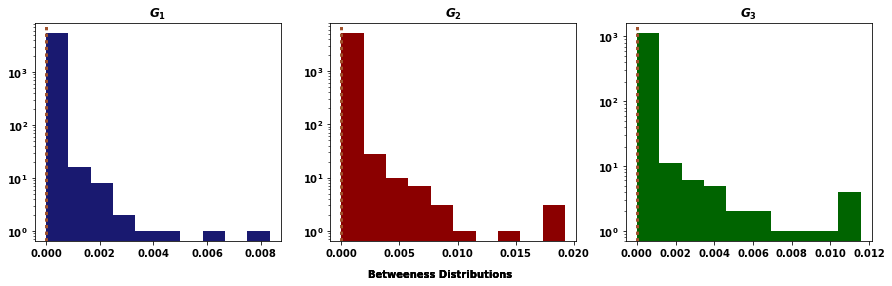

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_betweeness):
    axes[i].hist(dstr, color=colors[i], log=True)
    print(np.median(dstr))
    axes[i].axvline(
        np.median(dstr), color="sienna", linestyle=":", linewidth=3, label="median"
    )
    axes[i].title.set_text(labels[i])

    fig.text(0.5, 0.00, "Betweeness Distributions", ha="center", fontsize=10)

plt.savefig("../../assets/images/betweeness_distributions.pdf")


In [20]:
for dist in distributions_betweeness:
    temp = pd.DataFrame(dist)
    print(temp.describe())


                 0
count  5394.000000
mean      0.000019
std       0.000207
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.008331
                 0
count  5165.000000
mean      0.000086
std       0.000693
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.019251
                 0
count  1155.000000
mean      0.000151
std       0.000931
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.011553


In [21]:
test_kruskal(distributions_betweeness)


1.10882382084e-19 The null hypothesis can be rejected.


1.1088238208370735e-19

**pair wise comparison**

In [22]:
test_kruskal([distributions_betweeness[0], distributions_betweeness[1]])


9.89604994758e-19 The null hypothesis can be rejected.


9.8960499475769533e-19

In [23]:
test_kruskal([distributions_betweeness[0], distributions_betweeness[2]])


1.10167521358e-09 The null hypothesis can be rejected.


1.1016752135779381e-09

In [24]:
test_kruskal([distributions_betweeness[1], distributions_betweeness[2]])


0.603273013512 The null hypothesis cannot be rejected.


0.60327301351220108

In [25]:
test_mannwhitneyu(
    [distributions_betweeness[0], distributions_betweeness[1]], alternative="less"
)


4.94826716226e-19 The null hypothesis can be rejected.


4.948267162262214e-19

In [26]:
test_mannwhitneyu(
    [distributions_betweeness[0], distributions_betweeness[2]], alternative="less"
)


5.50891346987e-10 The null hypothesis can be rejected.


5.5089134698672234e-10

**Closeness**

In [27]:
distributions_close = [[point[1] for point in coeff] for coeff in closeness]


0.000556276654923
0.000580945003873
0.00309482545184


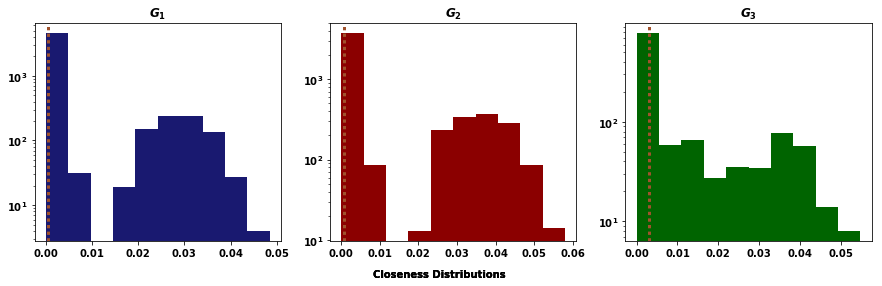

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_close):
    axes[i].hist(dstr, color=colors[i], log=True)
    print(np.median(dstr))
    axes[i].axvline(
        np.median(dstr), color="sienna", linestyle=":", linewidth=3, label="median"
    )
    axes[i].title.set_text(labels[i])

    fig.text(0.5, 0.00, "Closeness Distributions", ha="center", fontsize=10)

plt.savefig("../../assets/images/closeness_distributions.pdf")


In [29]:
for dist in distributions_close:
    temp = pd.DataFrame(dist)
    print(temp.describe())


                 0
count  5394.000000
mean      0.005013
std       0.010367
min       0.000000
25%       0.000371
50%       0.000556
75%       0.001383
max       0.048447
                 0
count  5165.000000
mean      0.010085
std       0.016039
min       0.000000
25%       0.000387
50%       0.000581
75%       0.024763
max       0.058028
                 0
count  1155.000000
mean      0.010136
std       0.013644
min       0.000000
25%       0.001733
50%       0.003095
75%       0.012998
max       0.054823


In [30]:
test_kruskal(distributions_close)


6.16028936454e-224 The null hypothesis can be rejected.


6.1602893645350358e-224

**Pairwise comparisons**

In [31]:
test_mannwhitneyu([distributions_close[0], distributions_close[1]], alternative="less")


3.29564197681e-31 The null hypothesis can be rejected.


3.295641976814261e-31

In [32]:
test_mannwhitneyu([distributions_close[0], distributions_close[2]], alternative="less")


2.467599842e-250 The null hypothesis can be rejected.


2.4675998420039801e-250

In [33]:
test_mannwhitneyu(
    [distributions_close[2], distributions_close[1]], alternative="greater"
)


3.72845480741e-114 The null hypothesis can be rejected.


3.7284548074114014e-114

**Exploring the clusters**

In [34]:
ipd = pd.read_json("../data/pd_November_2018_clean.json")
auction = pd.read_json("../data/auction_November_2018_clean.json")
anarchy = pd.read_json("../data/anarchy_November_2018_clean.json")


In [35]:
dataframes = [ipd, auction, anarchy]


In [36]:
for i, data in enumerate(dataframes):
    central_names = [entry[0] for entry in closeness[i] if entry[1] > 0.00]
    print(data[data["author"].isin(central_names)]["provenance"].unique())
    print(data[data["author"].isin(central_names)]["date"].unique())


[]
[]
['Springer' 'IEEE' 'arXiv' 'Nature']
[ 2018.  2010.  2000.  2017.  2009.  2016.  2015.  2002.  2006.  2004.
  2005.  2008.  2011.  2007.  2013.  2012.  2014.  2001.  2003.  1996.
  1995.  1994.  1999.  1992.  1976.  1988.  1998.  1993.  1989.  1997.
  1990.  1986.  1983.  1982.    nan]
['Springer' 'IEEE' 'Nature' 'arXiv' 'Manual' 'PLOS']
[ 2007.  2016.  2012.  2008.  2014.  2018.  2011.  2009.  2013.  2006.
  2015.  2010.  2017.    nan  2003.  2005.  2002.  1999.  2004.]


In [37]:
percentages = []
for i, data in enumerate(dataframes):
    central_names = [entry[0] for entry in closeness[i] if entry[1] > 0.02]
    percentages.append(len(central_names))
percentages


[789, 1348, 226]

In [38]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction="out")
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel("Closseness centrality")


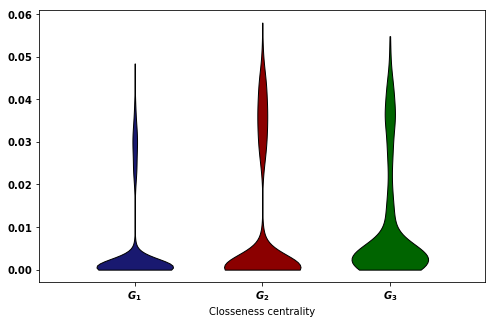

In [39]:
fig, axes = plt.subplots(figsize=(8, 5))
parts = plt.violinplot(
    distributions_close, widths=0.6, showmedians=False, showextrema=False
)

for i, pc in enumerate(parts["bodies"]):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor("black")
    pc.set_alpha(1)

set_axis_style(axes, labels)

plt.savefig("../../assets/images/closeness_violins.pdf")


**Clusters**

In [40]:
center_clusters = [max(nx.connected_component_subgraphs(G), key=len) for G in graphs]


In [41]:
betweeness_clusters = [
    sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)
    for G in center_clusters
]


In [42]:
closeness_clusters = [
    sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
    for G in center_clusters
]


In [43]:
distributions_closeness_cluster = [
    [point[1] for point in coeff] for coeff in closeness_clusters
]


0.19170984456
0.139217611865
0.1868133203


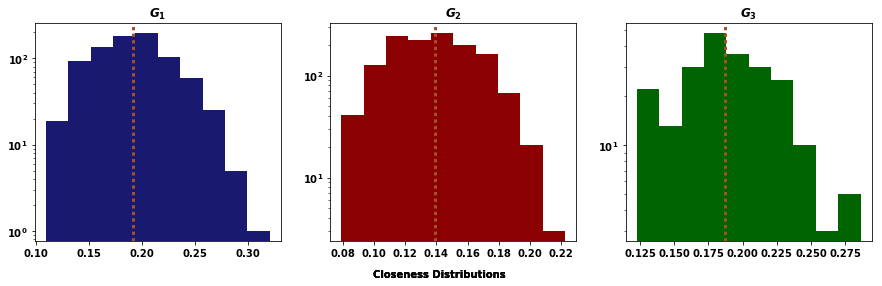

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_closeness_cluster):
    axes[i].hist(dstr, color=colors[i], log=True)
    print(np.median(dstr))
    axes[i].axvline(
        np.median(dstr), color="sienna", linestyle=":", linewidth=3, label="median"
    )
    axes[i].title.set_text(labels[i])

    fig.text(0.5, 0.00, "Closeness Distributions", ha="center", fontsize=10)

plt.savefig("../../assets/images/closeness_distributions_clusters.pdf")


In [45]:
for dist in distributions_closeness_cluster:
    temp = pd.DataFrame(dist)
    print(temp.describe())


                0
count  815.000000
mean     0.192305
std      0.035247
min      0.109247
25%      0.163021
50%      0.191710
75%      0.214889
max      0.320978
                 0
count  1348.000000
mean      0.139324
std       0.026557
min       0.079226
25%       0.120230
50%       0.139218
75%       0.160692
max       0.222461
                0
count  222.000000
mean     0.189437
std      0.035204
min      0.122642
25%      0.160932
50%      0.186813
75%      0.215820
max      0.286269


In [46]:
test_kruskal(distributions_closeness_cluster)


7.33629478586e-219 The null hypothesis can be rejected.


7.3362947858631229e-219

In [47]:
test_kruskal([distributions_closeness_cluster[0], distributions_closeness_cluster[2]])


0.280877970073 The null hypothesis cannot be rejected.


0.28087797007273108

In [48]:
test_kruskal([distributions_closeness_cluster[0], distributions_closeness_cluster[1]])


8.26682782247e-194 The null hypothesis can be rejected.


8.2668278224659977e-194

In [49]:
test_mannwhitneyu(
    [distributions_closeness_cluster[0], distributions_closeness_cluster[1]],
    alternative="greater",
)


4.13778166208e-194 The null hypothesis can be rejected.


4.1377816620796683e-194

**distributions betweeness clusters**

In [50]:
distributions_betweeness_clusters = [
    [point[1] for point in coeff] for coeff in betweeness_clusters
]


0.0
0.0
0.0


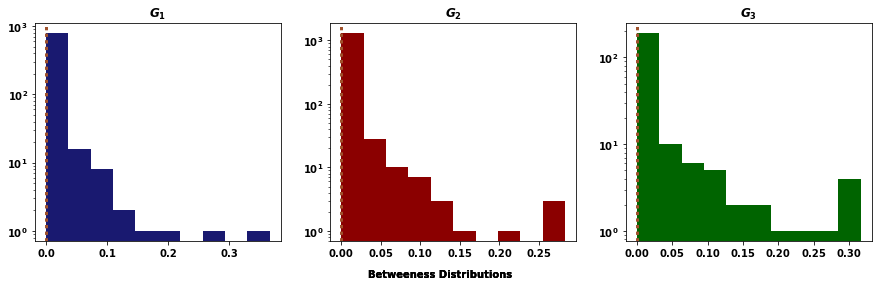

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_betweeness_clusters):
    axes[i].hist(dstr, color=colors[i], log=True)
    print(np.median(dstr))
    axes[i].axvline(
        np.median(dstr), color="sienna", linestyle=":", linewidth=3, label="median"
    )
    axes[i].title.set_text(labels[i])

    fig.text(0.5, 0.00, "Betweeness Distributions", ha="center", fontsize=10)
plt.savefig('../../assets/images/betweeness_distributions_clusters.pdf')


In [52]:
for dist in distributions_betweeness_clusters:
    temp = pd.DataFrame(dist)
    print(temp.describe())


                0
count  815.000000
mean     0.005394
std      0.022920
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000685
max      0.366050
                 0
count  1348.000000
mean      0.004796
std       0.019530
min       0.000000
25%       0.000000
50%       0.000000
75%       0.001485
max       0.283100
                0
count  222.000000
mean     0.020329
std      0.055084
min      0.000000
25%      0.000000
50%      0.000000
75%      0.010851
max      0.316164


In [53]:
test_kruskal(distributions_betweeness_clusters)


0.0607467116949 The null hypothesis cannot be rejected.


0.060746711694943022

In [54]:
test_mannwhitneyu(
    [distributions_betweeness_clusters[0], distributions_betweeness_clusters[1]]
)


0.467899588614 The null hypothesis cannot be rejected.


0.46789958861385561

In [55]:
test_mannwhitneyu(
    [distributions_betweeness_clusters[1], distributions_betweeness_clusters[2]],
    alternative="less",
)


0.0199799902515 The null hypothesis can be rejected.


0.019979990251474594

In [56]:
test_mannwhitneyu(
    [distributions_betweeness_clusters[0], distributions_betweeness_clusters[2]],
    alternative="less",
)


0.0101379522724 The null hypothesis can be rejected.


0.010137952272397936